# Automatic Differentiation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dual_autodiff.dual import Dual

Automatic Differentiation Package version: 0.0.8


## Consider the function:

$f(x) = \log(\sin(x)) + x^2 \cos(x)$

A comparison is made between the results of:

1. **The analytical derivative** evaluated at \( x = 1.5 \).
2. **The numerical derivative** evaluated at \( x = 1.5 \) for different step sizes.
3. **Automatic differentiation** using the dual number defined as \(x = 1.5 + 𝜖 \)


In [2]:
# Define the function f(x)
def f(x):
    """
    Computes the value of the function f(x) = log(sin(x)) + x^2 * cos(x).

    Args:
        x (float): The input value for the function.

    Returns:
        float: The value of the function f(x) evaluated at the given x.
    """
    return np.log(np.sin(x)) + x**2 * np.cos(x)

# Analytical derivative of f(x)
def analytical_derivative(x):
    """
    Computes the analytical derivative of the function f(x) = log(sin(x)) + x^2 * cos(x).

    The analytical derivative is computed using the derivative of each term:
    f'(x) = (cos(x) / sin(x)) + 2 * x * cos(x) - x^2 * sin(x).

    Args:
        x (float): The point at which the derivative is evaluated.

    Returns:
        float: The value of the analytical derivative of f(x) evaluated at x.
    """
    return (np.cos(x) / np.sin(x)) + 2 * x * np.cos(x) - x**2 * np.sin(x)

# Numerical derivative using finite differences
def numerical_derivative(x, h):
    """
    Computes the numerical derivative of f(x) using finite differences.

    The numerical derivative is approximated using the formula:
    f'(x) ≈ (f(x + h) - f(x)) / h, where h is a small step size.

    Args:
        x (float): The point at which the derivative is evaluated.
        h (float): The step size for the finite difference approximation.

    Returns:
        float: The numerical derivative of f(x) evaluated at x using step size h.
    """
    return (f(x + h) - f(x)) / h

# Define f(x) using Dual numbers
def f_dual(x):
    """
    Computes the value of the function f(x) using dual numbers for automatic differentiation.

    The function f(x) is defined as f(x) = x.sin().log() + (x.pow(2)) * x.cos(), where 
    `x.sin()`, `x.log()`, `x.cos()`, and `x.pow()` are methods defined for dual numbers, and can be used
    through the `dual_autodiff` package

    Args:
        x (Dual): A dual number object representing the input value for the function.

    Returns:
        Dual: The value of the function f(x) as a dual number, including the real and dual parts.
    """
    return x.sin().log() + (x.pow(2))*(x.cos())

In [8]:
# Dual computation
x_dual = Dual(1.5, 1)  # Real part = 1.5, dual part = 1
f_dual_result = f_dual(x_dual)
dual_derivative = f_dual_result.dual
print(f'The derivative of the function f(x) evaluated at x = 1.5 using automatic differentiation (dual numbers) is: {dual_derivative}')

The derivative of the function f(x) evaluated at x = 1.5 using automatic differentiation (dual numbers) is: -1.9612372705533612


In [7]:
# Numerical derivative computation
h_values = np.logspace(-17, -1, 100)  # Step sizes from 10^-17 to 10^-1
numerical_derivatives = [numerical_derivative(x_dual.real, h) for h in h_values]
print(f'The derivative of the function f(x) evaluated at x = 1.5 using the numerical derivative with step size 10^-6 is: {numerical_derivative(1.5, 1e-6)}')

The derivative of the function f(x) evaluated at x = 1.5 using the numerical derivative with step size 10^-6 is: -1.9612407742009008


In [9]:
# Analytical derivative
analytical_value = analytical_derivative(x_dual.real)
print(f'The derivative of the function f(x) evaluated at x = 1.5 using the analytical derivative is: {analytical_value}')

The derivative of the function f(x) evaluated at x = 1.5 using the analytical derivative is: -1.9612372705533612


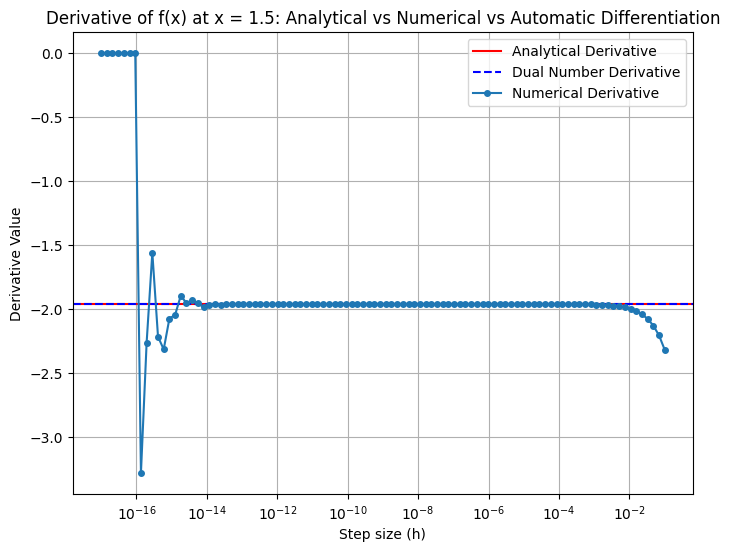

In [12]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.axhline(analytical_value, color="red", linestyle="-", label="Analytical Derivative")
plt.axhline(dual_derivative, color="blue", linestyle="--", label="Dual Number Derivative")
plt.plot(h_values, numerical_derivatives, label="Numerical Derivative", marker="o", markersize=4)
plt.xscale("log")
plt.xlabel("Step size (h)")
plt.ylabel("Derivative Value")
plt.title("Derivative of f(x) at x = 1.5: Analytical vs Numerical vs Automatic Differentiation")
plt.legend()
plt.grid()
plt.show()